In [ ]:
import numpy as np
import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
# from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [ ]:

def load_data():
    X = np.load("X.npy")
    y = np.load("y.npy")
    X = X[0:1000]
    y = y[0:1000]
    return X, y


In [ ]:
# load dataset
X, y = load_data()
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [ ]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  1


In [ ]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


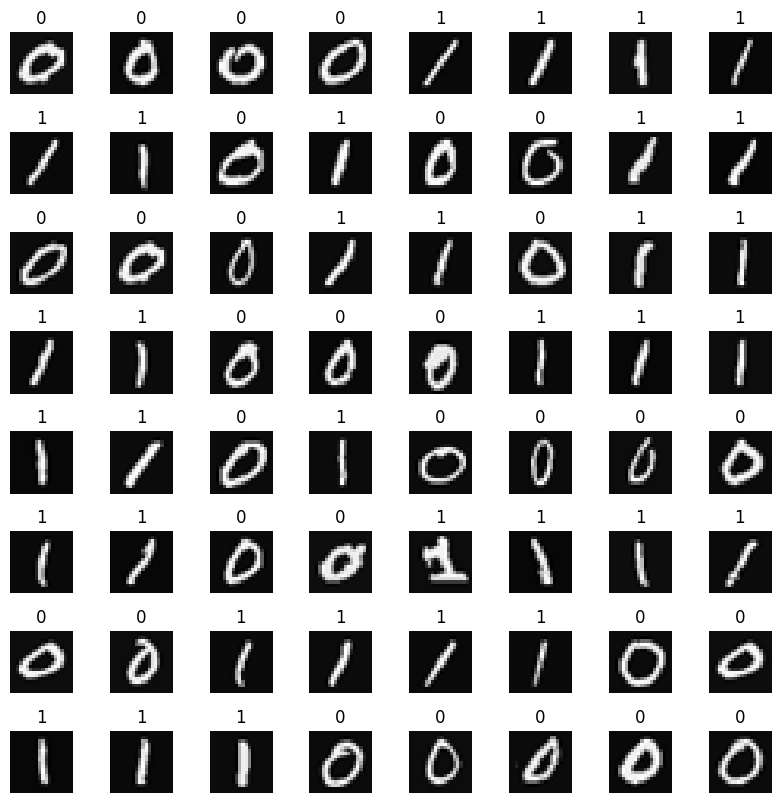

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [ ]:
model = tf.keras.Sequential(
    [tf.keras.Input(shape=(400,)),tf.keras.layers.Dense(units = 25 , activation = "sigmoid",name="layer1"),tf.keras.layers.Dense(units = 15, activation = "sigmoid",name="layer2"),tf.keras.layers.Dense(units= 1,activation = "sigmoid",name="layer3")],name="my_model"
)

In [ ]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                10025     
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 1)                 16        
                                                                 
Total params: 10431 (40.75 KB)
Trainable params: 10431 (40.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
def test_c1(target):
    assert len(target.layers) == 3, \
        f"Wrong number of layers. Expected 3 but got {len(target.layers)}"
    assert target.input.shape.as_list() == [None, 400], \
        f"Wrong input shape. Expected [None,  400] but got {target.input.shape.as_list()}"
    i = 0
    expected = [[tf.keras.layers.Dense, [None, 25], tf.keras.activations.sigmoid],
                [tf.keras.layers.Dense, [None, 15], tf.keras.activations.sigmoid],
                [tf.keras.layers.Dense, [None, 1], tf.keras.activations.sigmoid]]

    for layer in target.layers:
        assert type(layer) == expected[i][0], \
            f"Wrong type in layer {i}. Expected {expected[i][0]} but got {type(layer)}"
        assert layer.output.shape.as_list() == expected[i][1], \
            f"Wrong number of units in layer {i}. Expected {expected[i][1]} but got {layer.output.shape.as_list()}"
        assert layer.activation == expected[i][2], \
            f"Wrong activation in layer {i}. Expected {expected[i][2]} but got {layer.activation}"
        i = i + 1

    print("\033[92mAll tests passed!")


In [ ]:
test_c1(model)

All tests passed!


In [ ]:
[layer1, layer2, layer3] = model.layers

In [ ]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [ ]:
print(model.layers[2].weights)

[<tf.Variable 'layer3/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[ 0.3269115 ],
       [-0.4675265 ],
       [-0.58368605],
       [-0.5824404 ],
       [-0.0718075 ],
       [ 0.5543694 ],
       [ 0.46675843],
       [ 0.01007175],
       [ 0.27062798],
       [-0.09737343],
       [ 0.03006876],
       [ 0.4183504 ],
       [ 0.15064728],
       [ 0.4023041 ],
       [ 0.56146866]], dtype=float32)>, <tf.Variable 'layer3/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [ ]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 1s 3ms/step - loss: 0.6143
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4590
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3185
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2201
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1596
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1219
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0971
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0798
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0671
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0575
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0500
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0441
Epoch 13/20
32/32 [==============================

In [ ]:
# and just at the end we print what we have
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

1/1 [==============================] - 0s 107ms/step
 predicting a zero: [[0.0220192]]
1/1 [==============================] - 0s 35ms/step
 predicting a one:  [[0.98966336]]


In [ ]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


1/1 [==============================] - 0s 23ms/step


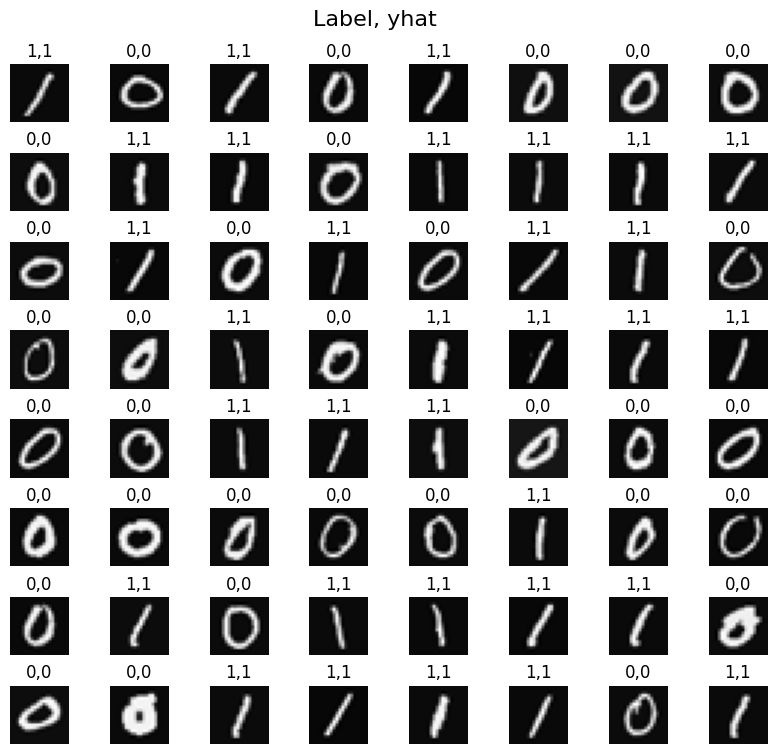

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

1/1 [==============================] - 0s 20ms/step


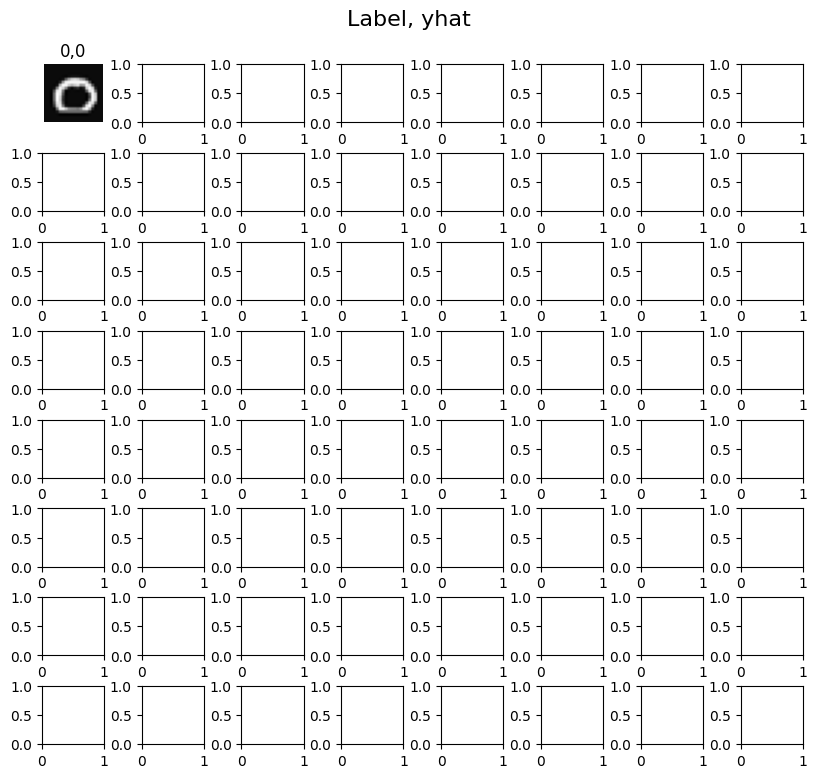

1/1 [==============================] - 0s 35ms/step


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
    fig.suptitle("Label, yhat", fontsize=16)
    plt.show()

In [ ]:
def Dense(a_in,W,b,g):
  #which is the number of columns
  n = W.shape[1]
  m = a_in.shape[0]
  a_out = np.zeros(n)
  for j in range(n):
  # which means take the whole column
    w=W[:,j]
    z = np.dot(w,a_in)+b[j]
    a_out[j]=g(z)

  return a_out

In [ ]:
x_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 features)
A_tst = Dense(x_tst, W_tst, b_tst, tf.keras.activations.sigmoid)
print(A_tst)

[0.54735762 0.57932425 0.61063923]


In [ ]:
def test_c2(target):

    def linear(a):
        return a

    def linear_times3(a):
        return a * 3

    x_tst = np.array([1., 2., 3., 4.])  # (1 examples, 3 features)
    W_tst = np.array([[1., 2.], [1., 2.], [1., 2.], [1., 2.]]) # (3 input features, 2 output features)
    b_tst = np.array([0., 0.])  # (2 features)

    A_tst = target(x_tst, W_tst, b_tst, linear)
    assert A_tst.shape[0] == len(b_tst)
    assert np.allclose(A_tst, [10., 20.]), \
        "Wrong output. Check the dot product"

    b_tst = np.array([3., 5.])  # (2 features)

    A_tst = target(x_tst, W_tst, b_tst, linear)
    assert np.allclose(A_tst, [13., 25.]), \
        "Wrong output. Check the bias term in the formula"

    A_tst = target(x_tst, W_tst, b_tst, linear_times3)
    assert np.allclose(A_tst, [39., 75.]), \
        "Wrong output. Did you apply the activation function at the end?"

    print("\033[92mAll tests passed!")


In [ ]:
test_c2(Dense)

All tests passed!


In [ ]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = Dense(x,  W1, b1, tf.keras.activations.sigmoid)
    a2 = Dense(a1, W2, b2, tf.keras.activations.sigmoid)
    a3 = Dense(a2, W3, b3, tf.keras.activations.sigmoid)
    return(a3)

In [ ]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

In [ ]:
prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[0,0])
prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[500,0])

yhat =  0  label=  0
yhat =  1  label=  1


1/1 [==============================] - 0s 21ms/step


<ipython-input-41-620dacf31e47>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  my_yhat = int(my_prediction >= 0.5)
<ipython-input-41-620dacf31e47>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tf_yhat = int(tf_prediction >= 0.5)


1/1 [==============================] - 0s 20ms/step


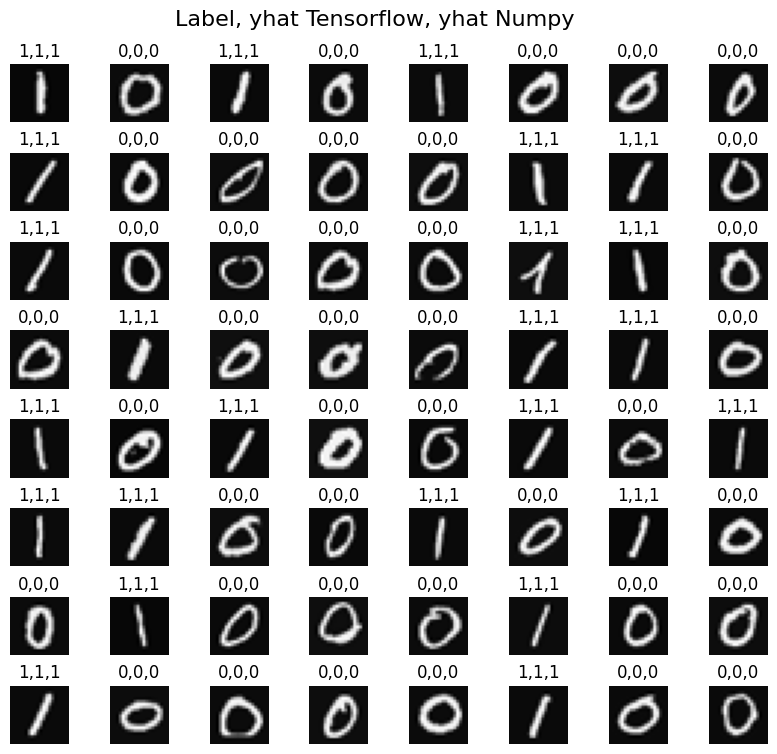

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network implemented in Numpy
    my_prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
    my_yhat = int(my_prediction >= 0.5)

    # Predict using the Neural Network implemented in Tensorflow
    tf_prediction = model.predict(X[random_index].reshape(1,400))
    tf_yhat = int(tf_prediction >= 0.5)

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{tf_yhat},{my_yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()

In [ ]:
x = X[0].reshape(-1,1)         # column vector (400,1)
z1 = np.matmul(x.T,W1) + b1    # (1,400)(400,25) = (1,25)
a1 = tf.keras.activations.sigmoid(z1)
print(a1.shape)

(1, 25)


In [ ]:
def my_dense_v(A_in,W,b,g):
  A_out = g(np.matmul(A_in,W)+b)

  return A_out

In [ ]:
X_tst = 0.1*np.arange(1,9,1).reshape(4,2) # (4 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3) # (1, 3 features)
A_tst = my_dense_v(X_tst, W_tst, b_tst, tf.keras.activations.sigmoid)
print(A_tst)

tf.Tensor(
[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]], shape=(4, 3), dtype=float64)


In [ ]:
def test_c3(target):

    def linear(a):
        return a

    def linear_times3(a):
        return a * 3

    x_tst = np.array([1., 2., 3., 4.])  # (1 examples, 3 features)
    W_tst = np.array([[1., 2.], [1., 2.], [1., 2.], [1., 2.]]) # (3 input features, 2 output features)
    b_tst = np.array([0., 0.])  # (2 features)

    A_tst = target(x_tst, W_tst, b_tst, linear)
    assert A_tst.shape[0] == len(b_tst)
    assert np.allclose(A_tst, [10., 20.]), \
        "Wrong output. Check the dot product"

    b_tst = np.array([3., 5.])  # (2 features)

    A_tst = target(x_tst, W_tst, b_tst, linear)
    assert np.allclose(A_tst, [13., 25.]), \
        "Wrong output. Check the bias term in the formula"

    A_tst = target(x_tst, W_tst, b_tst, linear_times3)
    assert np.allclose(A_tst, [39., 75.]), \
        "Wrong output. Did you apply the activation function at the end?"

    x_tst = np.array([[1., 2., 3., 4.], [5., 6., 7., 8.]])  # (2 examples, 4 features)
    W_tst = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12]]) # (3 input features, 2 output features)
    b_tst = np.array([0., 0., 0.])  # (2 features)

    A_tst = target(x_tst, W_tst, b_tst, linear)
    assert A_tst.shape == (2, 3)
    assert np.allclose(A_tst, [[ 70.,  80.,  90.], [158., 184., 210.]]), \
        "Wrong output. Check the dot product"

    b_tst = np.array([3., 5., 6])  # (3 features)

    A_tst = target(x_tst, W_tst, b_tst, linear)
    assert np.allclose(A_tst, [[ 73.,  85.,  96.], [161., 189., 216.]]), \
        "Wrong output. Check the bias term in the formula"

    A_tst = target(x_tst, W_tst, b_tst, linear_times3)
    assert np.allclose(A_tst, [[ 219.,  255.,  288.], [483., 567., 648.]]), \
        "Wrong output. Did you apply the activation function at the end?"

    print("\033[92mAll tests passed!")

In [ ]:
test_c3(my_dense_v)

All tests passed!


In [ ]:
def my_sequential_v(X, W1, b1, W2, b2, W3, b3):
    A1 = my_dense_v(X,  W1, b1, tf.keras.activations.sigmoid)
    A2 = my_dense_v(A1, W2, b2, tf.keras.activations.sigmoid)
    A3 = my_dense_v(A2, W3, b3, tf.keras.activations.sigmoid)
    return(A3)

In [ ]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

In [ ]:
Prediction = my_sequential_v(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
Prediction.shape

TensorShape([1000, 1])

In [ ]:
Yhat = (Prediction >= 0.5).numpy().astype(int)
print("predict a zero: ",Yhat[0], "predict a one: ", Yhat[500])

predict a zero:  [0] predict a one:  [1]


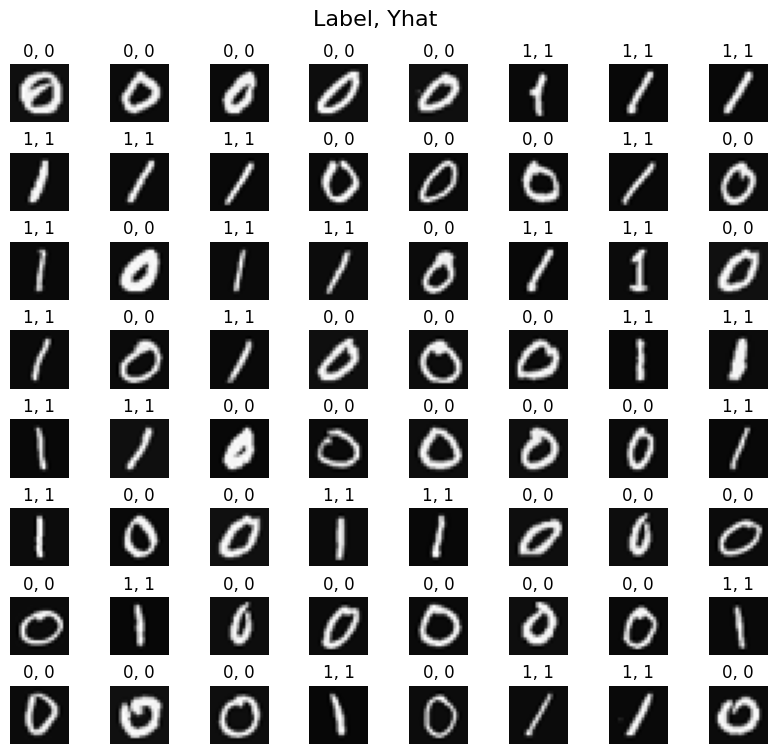

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
    ax.set_axis_off()
fig.suptitle("Label, Yhat", fontsize=16)
plt.show()